#  Predicción de Diabetes mediante Modelos de Machine Learning

 ## *Análisis del BRFSS 2015 usando Regresión Logística y Random Forest*

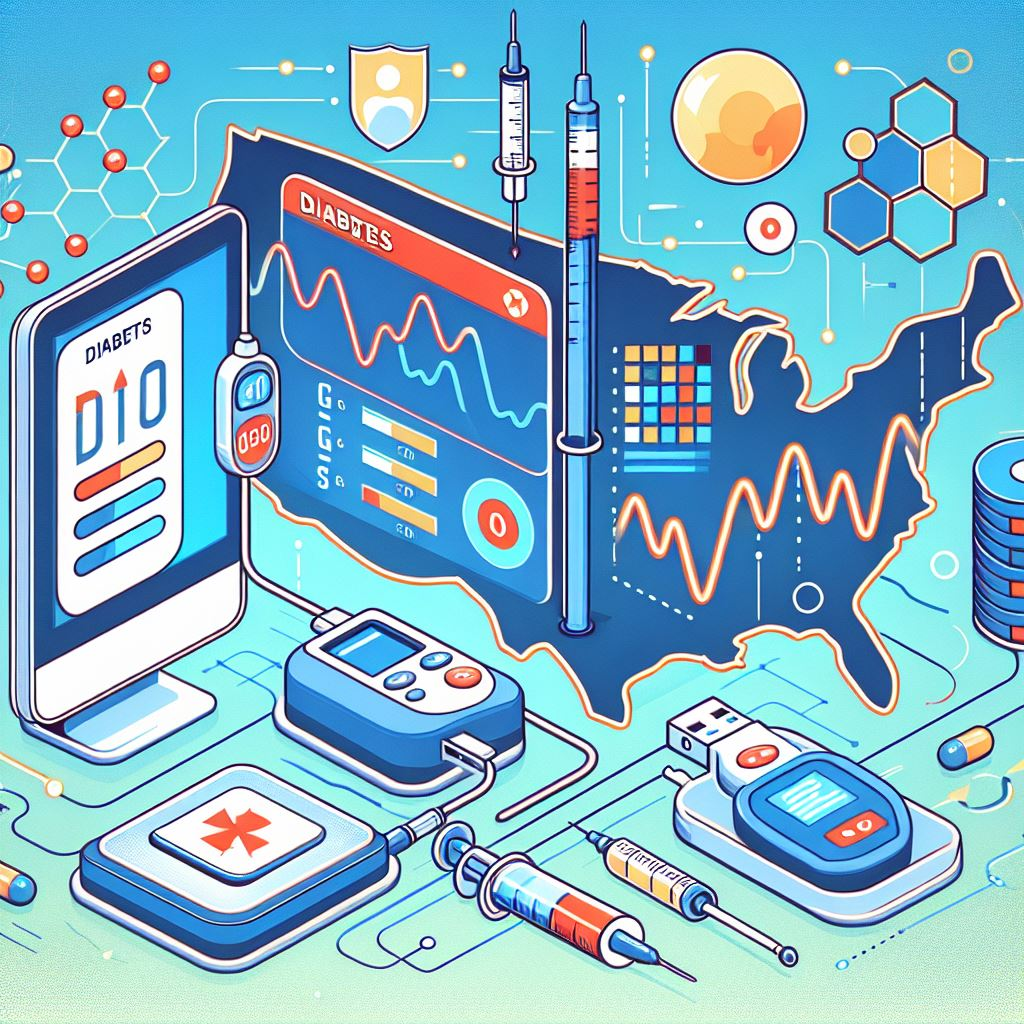

### **Introducción**

La **diabetes** es una de las enfermedades crónicas más prevalentes y preocupantes en los Estados Unidos, impactando la vida de millones de personas y generando un enorme costo económico. Se trata de una condición en la que el organismo pierde la capacidad de regular eficazmente los niveles de glucosa en sangre, lo que puede provocar complicaciones graves como enfermedades cardíacas, pérdida de visión, amputaciones de extremidades y daño renal.

De acuerdo con los **Centros para el Control y la Prevención de Enfermedades** (CDC), en 2018, aproximadamente **34.2 millones de estadounidenses tenían diabetes**, mientras que **88 millones padecían prediabetes**. Sorprendentemente, el **20%** de los diabéticos y el **80%** de los prediabéticos desconocen su condición, lo que subraya la importancia de estrategias preventivas y de diagnóstico temprano.

Afortunadamente, los modelos predictivos de Machine Learning representan una herramienta poderosa para identificar a individuos en riesgo, facilitando intervenciones oportunas que pueden mejorar la calidad de vida y reducir el impacto económico de la enfermedad.



### Sobre el conjunto de datos

Para este proyecto se utilizó el conjunto de datos **BRFSS** (Behavioral Risk Factor Surveillance System) correspondiente al año 2015, disponible en la plataforma **Kaggle**. El BRFSS es una encuesta telefónica anual llevada a cabo por los CDC desde 1984, que recopila información sobre factores de riesgo relacionados con la salud, condiciones crónicas y uso de servicios preventivos.

El conjunto de datos original contiene:

+ **441,455** individuos encuestados.
+ **330** características que incluyen preguntas directas a los participantes y variables calculadas a partir de sus respuestas. \\

Aquí vamos a destacar algunos puntos, en primera el dataset ha sido previamente limpiado (tarea que más adelante verificaremos); en segundo, el archivo final contiene 70,692 datos con 21 características. Esto porque el conjunto de datos original tiene demasiado sesgo en la variable predicha teniendo demasiadas muestras de personas no diabéticas, lo que generaría impresición a la hora de comparar los modelos, dicho esto el conjunto de datos que utilizaremos está balanceado, esto es, 50% de los datos son de un clase y  50% de la otra clase; también nos aseguramos de tener las características más indispensables para el modelo las cuales son las siguientes: \\
+ **Blood pressure (high):** 0 = Presión arterial No alta; 1 = Presión arterial alta
+ **Cholesterol (high):** 0 = Colesterol no alto; 1 = Colesterol alto
+ **Cholesterol check:** 0 = No se ha checado el colesterol en 5 años; 1 = sí lo ha hecho
+ **Smoking:** Responde a la pregunta "¿has fumado 100 cigarrillos en toda tu vida?" 0 = No; 1 = Sí
+ **Diabetes:** Variable a predecir. 0 = No diabetes; 1 = diabetes o prediabetes
+ **Stroke:** La pregunta es si ha sufrido un derrame cerebral. 0 = No; 1 = Sí
+ **Hearth disease or attack:** 0 = No; 1 = Sí
+ **Age:** Categoría de edad de 13 niveles (intervalos)
+ **Sex:** 0 = Femenino; 1 = Masculino
+ **Fruits:** Consumo de fruta 1 o más veces por día. 0 = No; 1 = Sí
+ **Veggies:** Consumo de vegetales 1 o más veces por día. 0 = No; 1 = Sí
+ **Exercise:** Actividad física en los últimos 30  días. 0 = No; 1 = Sí
+ **Alcohol consumption:** En hombres adultos más de 14 bebidas a la semana y en mujeres adultas más de 7 por semana. 0 = No; 1 = Sí
+ **BMI:** Índice de masa corporal
+ **Income:** Escala de ingresos (escala 1-8) 1 = menos de $10,000; 5 = menos de $35,000;  8 = $75,000 o más
+ **Education:** Nivel de educación, (escala 1-6). 1 = Nunca asistió a la escuela o solo al jardín de infantes; 2 = Primaria, etc.
+ **Health care coverage:** Tiene algún tipo de cobertura de atención médica, incluido seguro médico, planes prepagos como HMO, etc. 0 = No; 1 = Sí
+ **Med Cost:** ¿Hubo alguna ocasión en los últimos 12 meses en la que necesitó ver a un médico pero no pudo debido al costo? 0 = No; 1 = Sí
+ **Health:** ¿Diría usted que en general su salud es:(escala 1-5) 1 = excelente; 2 = muy buena; 3 = buena; 4 = regular; 5 = mala?
+ **Mental Health:**  Escala de días de mala salud mental de 1 a 30 días
+ **Physical illness:** Días de enfermedad o lesión física en los últimos 30 días escala 1-30  
+ **Diff walk:** ¿Tiene usted serias dificultades para caminar o subir escaleras? 0 = No; 1 = Sí


Esta riqueza en la información permite analizar diversos factores de riesgo asociados con la diabetes y desarrollar modelos robustos que predigan la presencia de esta condición.

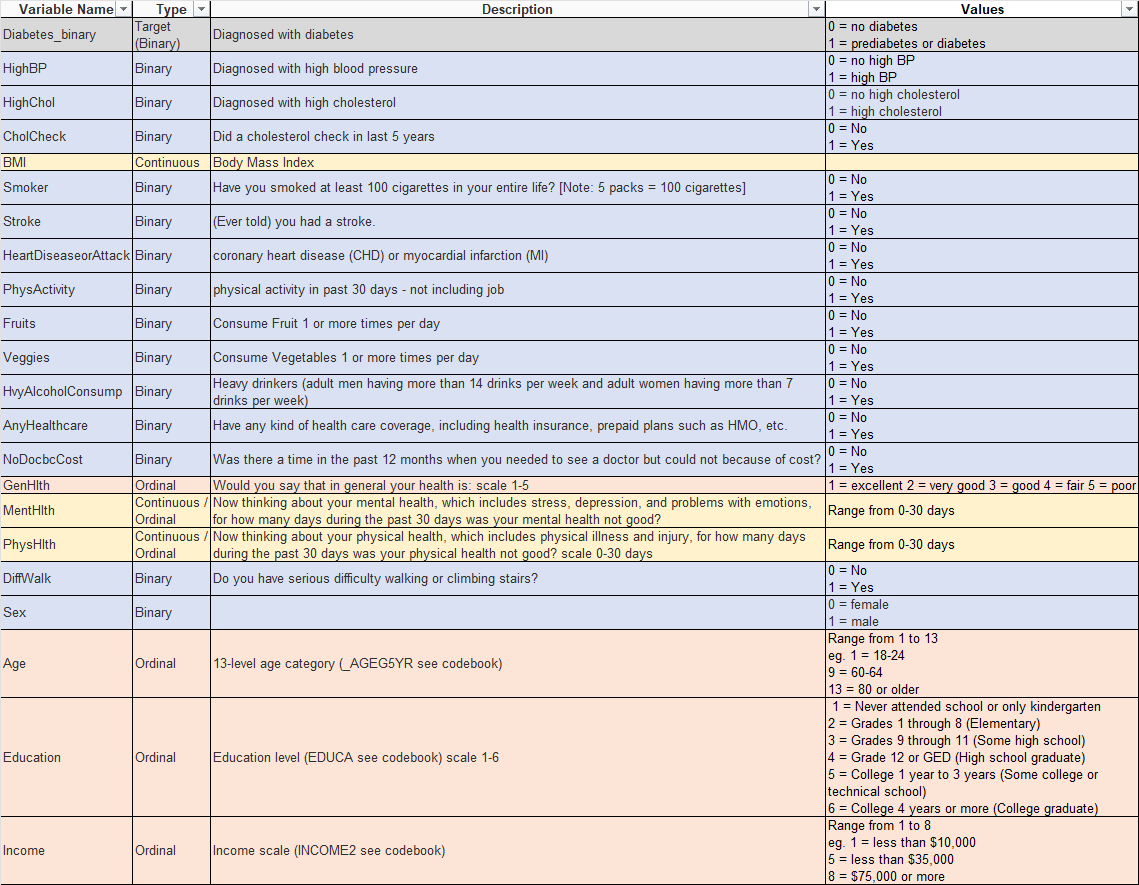

### Sobre los modelos

**Regresión Logística** \\
La Regresión Logística es un modelo lineal ampliamente utilizado para resolver problemas de clasificación binaria. Aunque el nombre sugiere "regresión", en realidad se basa en la probabilidad de que una observación pertenezca a una de las dos clases. La fórmula subyacente es una transformación logística o función sigmoide aplicada a una combinación lineal de las características de entrada:
$$P(Y=1∣X)= \frac{1}{1+e^{−(β_0+β_1​X_1​+⋯+β_nX_n)}}$$
Donde
+ $𝑃(𝑌=1)$ es la probabilidad de pertenecer a la clase positiva.
+ $𝛽_0$ es el término de sesgo (intercepto), y $𝛽_1,…,𝛽_𝑛$ son los coeficientes asociados a cada característica $𝑋_1,…,𝑋_𝑛$. \\
Este modelo es eficiente, interpretable y funciona bien cuando las características son linealmente separables. Sin embargo, puede verse limitado en presencia de relaciones no lineales en los datos.

**Random Forest**  \\
Random Forest
El Random Forest es un modelo basado en un conjunto de árboles de decisión (ensemble). Utiliza el método de bagging (Bootstrap Aggregating) para crear múltiples árboles de decisión a partir de subconjuntos aleatorios del conjunto de datos y de sus características. Posteriormente, combina las predicciones individuales de cada árbol para realizar una clasificación más robusta y precisa.

Ventajas clave de Random Forest:

+ Capacidad no lineal: Puede capturar relaciones complejas entre las características y la variable objetivo.
+ Reducción del sobreajuste: Al combinar múltiples árboles, se reduce el riesgo de sobreajustar el modelo a los datos de entrenamiento.
+ Importancia de características: Random Forest permite medir la importancia de cada característica en la predicción, lo cual es útil para la interpretación del modelo.
\\
En general, este modelo es una excelente opción para conjuntos de datos grandes y complejos, especialmente cuando se desconoce la relación exacta entre las variables predictoras y la variable objetivo.




Para asegurar una implementación neutral y reproducible, utilizaremos las versiones estándar de Regresión Logística y Random Forest disponibles en la biblioteca **Scikit-learn** de Python. Esta biblioteca es una herramienta robusta, optimizada y ampliamente utilizada en la comunidad científica y profesional para la construcción de modelos de **Machine Learning**.

### Importancia del proyecto


Dada la magnitud del problema y el desequilibrio inherente en la prevalencia de la diabetes, los modelos de Machine Learning pueden marcar una diferencia significativa en el diagnóstico temprano. Comparar el desempeño de **Regresión Logística** (modelo lineal simple) y **Random Forest** (modelo no lineal basado en árboles de decisión) permitirá entender cuál se adapta mejor a los datos y ofrece una mayor capacidad predictiva.

Con herramientas como estas, no solo se busca mejorar la identificación de individuos en riesgo, sino también generar un impacto positivo en la salud pública mediante estrategias basadas en datos.



Cargar las librerías que vamos a utilizar

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargar conjunto de datos

In [2]:
diabetes=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

Visualizar primeras 5 filas

In [3]:
diabetes.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

Nombre de las columnas (features)

In [4]:
diabetes.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Análisis exploratorio de los datos

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
diabetes.describe()

Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000      0.000000      0.000000              0.000000   
50%       29.000000      0.000000      0.000000              0.000000   
75%       33.000000      1.000000      0.000000              0.000000   
max       98.000000      1.000000      1.000000              1.000000   

       PhysActivity        Fruits  ...  AnyHealthcare   NoDocbcCost  \
count  70692.000000  70692.000000  ...   70692.000000  70692.000000   
mean       0.703036      0.611795  ...       0.954960      0.093914   
std        0.456924      0.487345  ...       0.207394      0.291712   
min        0.000000      0.000000  ...       0.000000      0.000000   
25%        0.000000      0.000000  ...       1.000000      0.000000   
50%        1.000000      1.000000  ...       1.000000      0.000000   
75%        1.000000      1.000000  ...       1.000000      0.000000   
max        1.000000      1.000000  ...       1.000000      1.000000   

            GenHlth      MentHlth      PhysHlth      DiffWalk           Sex  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       2.837082      3.752037      5.810417      0.252730      0.456997   
std        1.113565      8.155627     10.062261      0.434581      0.498151   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        3.000000      0.000000      0.000000      0.000000      0.000000   
75%        4.000000      2.000000      6.000000      1.000000      1.000000   
max        5.000000     30.000000     30.000000      1.000000      1.000000   

                Age     Education        Income  
count  70692.000000  70692.000000  70692.000000  
mean       8.584055      4.920953      5.698311  
std        2.852153      1.029081      2.175196  
min        1.000000      1.000000      1.000000  
25%        7.000000      4.000000      4.000000  
50%        9.000000      5.000000      6.000000  
75%       11.000000      6.000000      8.000000  
max       13.000000      6.000000      8.000000  

[8 rows x 22 columns]

Con esto se observa que no hay datos nulos en el dataset para ninguna característica, de igual forma no contiene errores de formato.

**Pairplot**

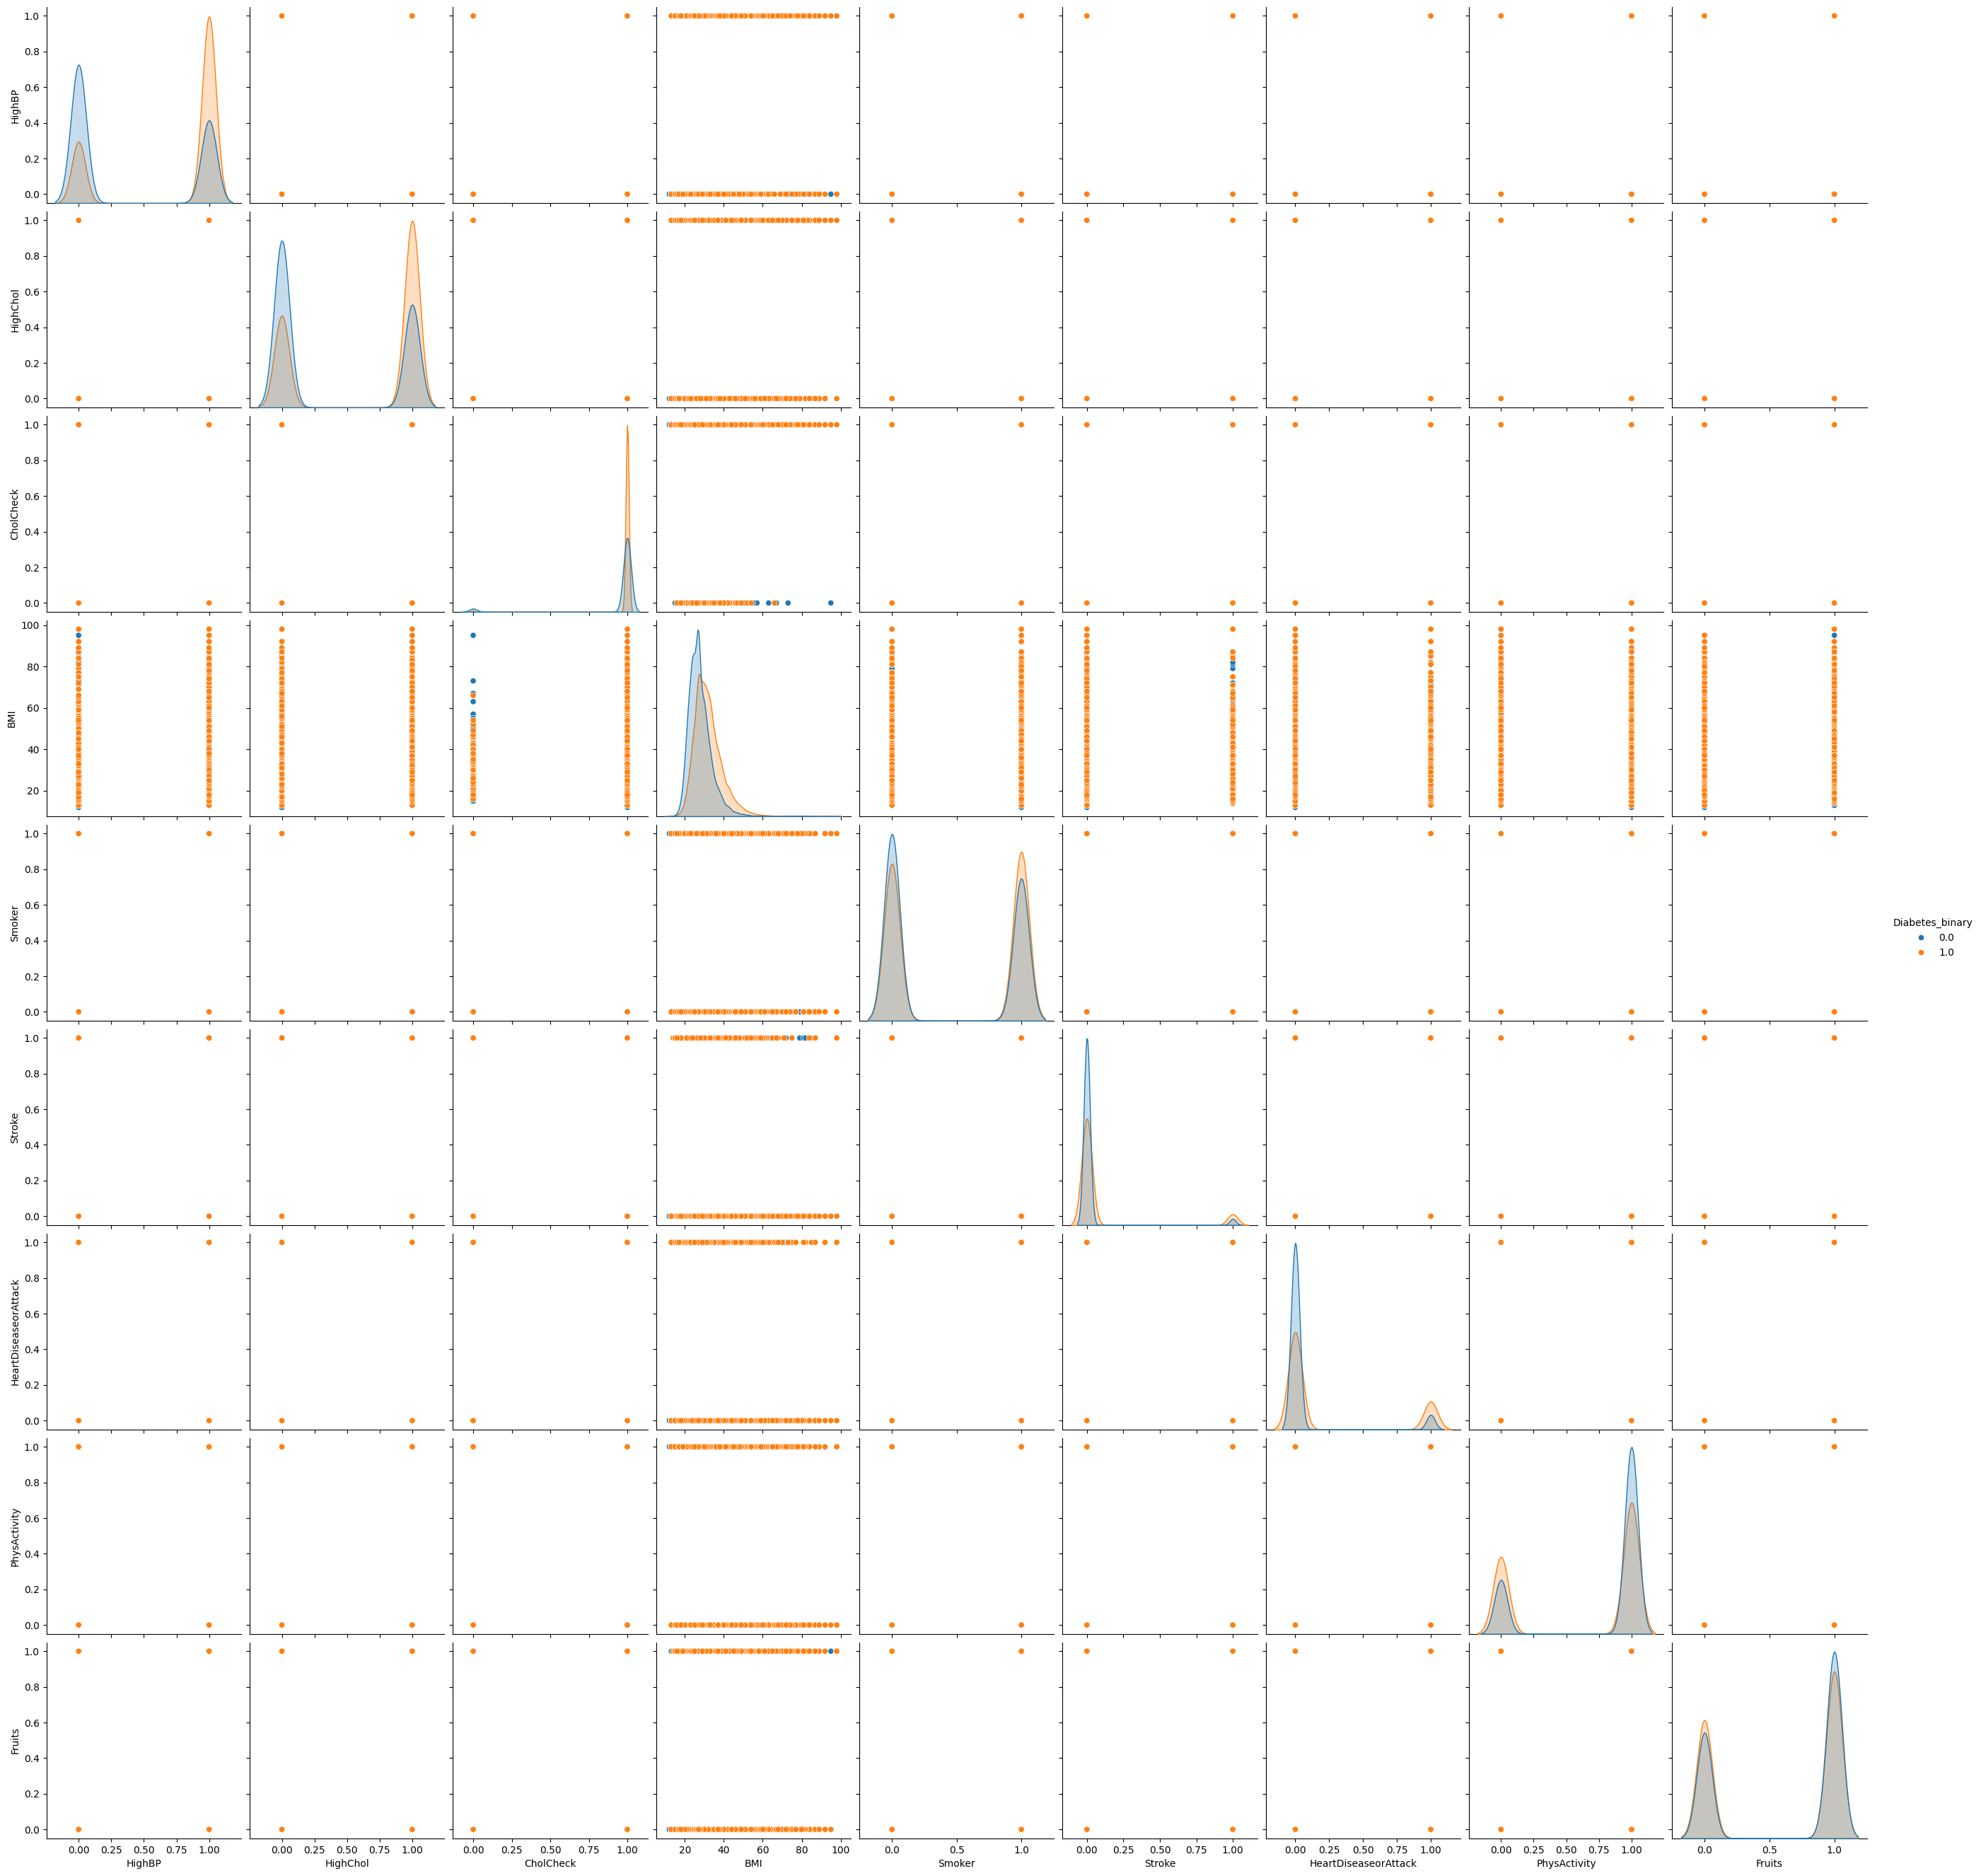

In [7]:
# Seleccionar las primeras 10 características y la variable objetivo
selected_columns = diabetes.columns[:10].tolist()
diabetes_subset = diabetes[selected_columns]

# Crear el pairplot solo con las primeras 10 características
sns.pairplot(diabetes_subset, hue='Diabetes_binary', diag_kind='kde', height=3)  # Cambia 'height' si lo necesitas
plt.show()

**Histogramas**

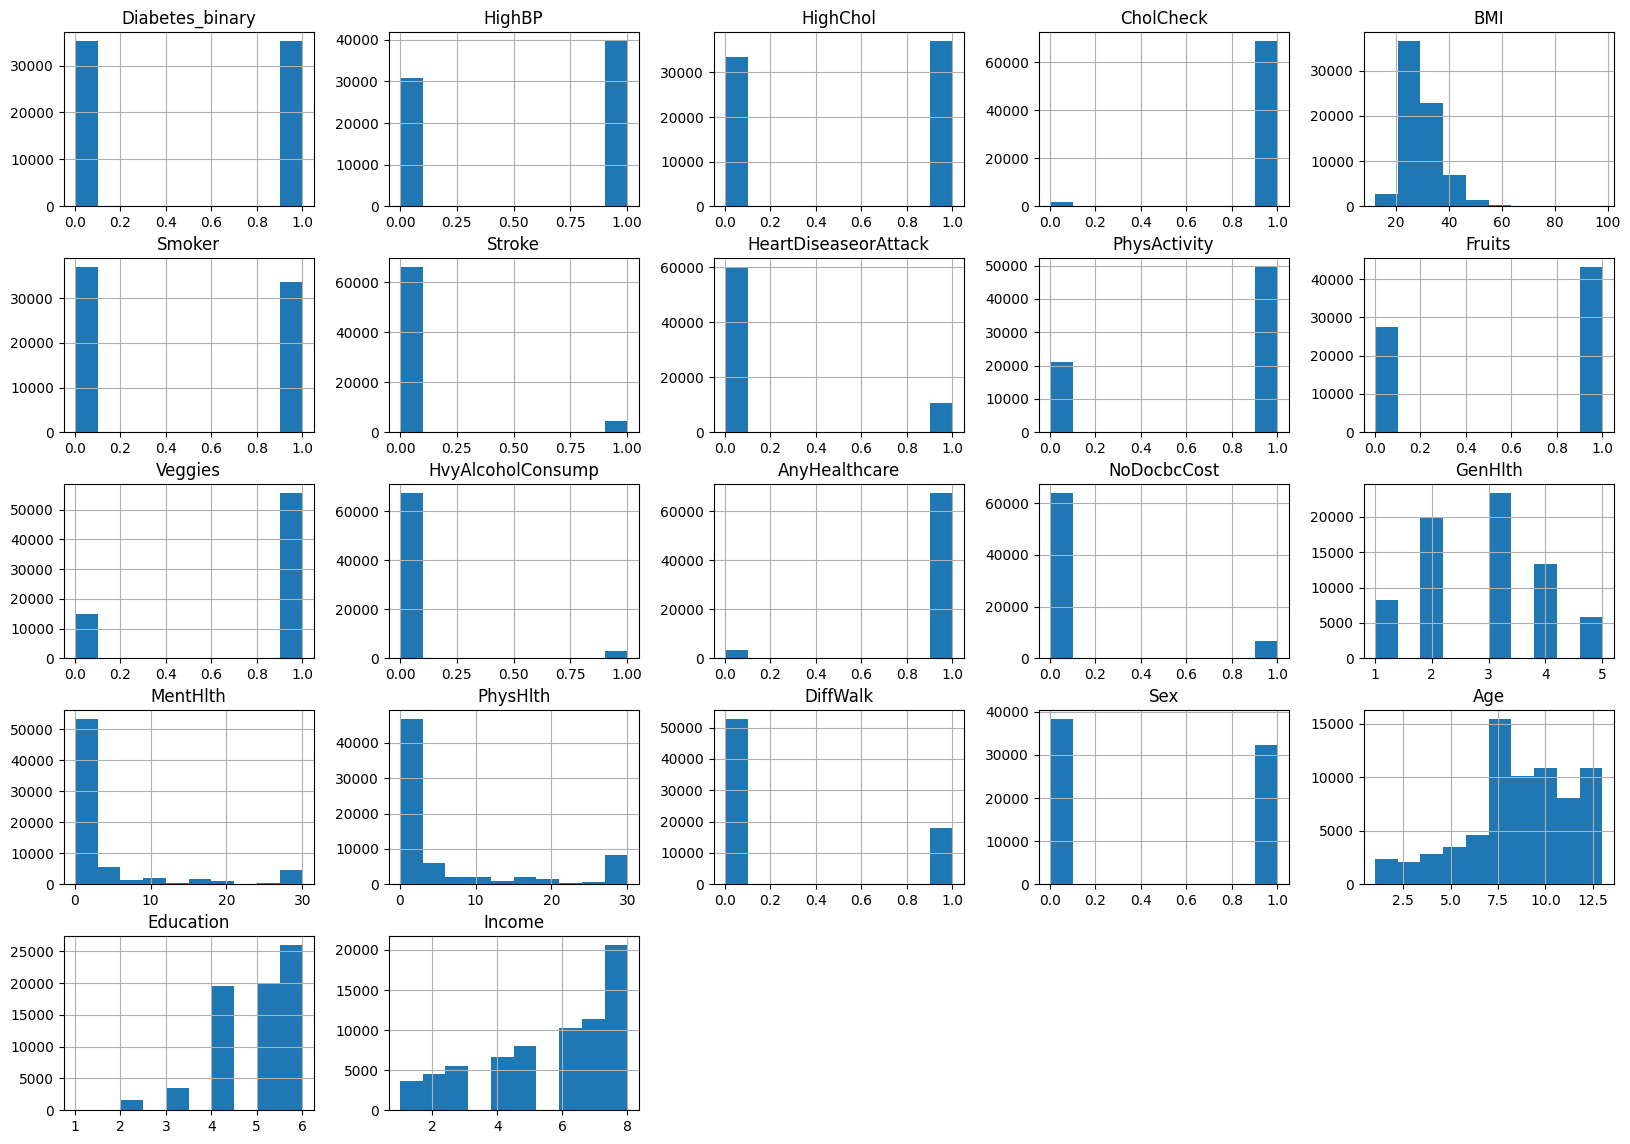

In [8]:
diabetes.hist(figsize=(20, 14))
plt.show()

Comprobaremos si contiene o no valores atípicos nuestro conjunto de datos.

**Identificación con el Rango Intercuartil (IQR)**

In [9]:
# Detectar valores atípicos usando IQR
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1

# Detectar valores fuera de los límites
outliers = ((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Total de valores atípicos por columna

Diabetes_binary             0
HighBP                      0
HighChol                    0
CholCheck                1749
BMI                      2181
Smoker                      0
Stroke                   4395
HeartDiseaseorAttack    10449
PhysActivity                0
Fruits                      0
Veggies                 14932
HvyAlcoholConsump        3020
AnyHealthcare            3184
NoDocbcCost              6639
GenHlth                     0
MentHlth                11816
PhysHlth                10624
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
dtype: int64


Veamos que, por ejemplo, con este criterio del IQR obtuvimos 14932 outliers para la característica *veggies*, sin embargo este criterio no es suficiente para determinar si hay que eliminar estos valores, pues al ser *veggies* una característica binaria, si no está balanceada puede ocurrir que uno de sus dos valores binarios los reconozca todos como outliers. El código siguiente muestra a lo que me refiero.

In [10]:
diabetes["Veggies"].value_counts()

Veggies
1.0    55760
0.0    14932
Name: count, dtype: int64

No hay outliers en este caso. Las gráficas de cajas nos ayudarán a visualizar mejor características que puedan tener o no valores atípicos.

**Creando una boxplot para cada característica**

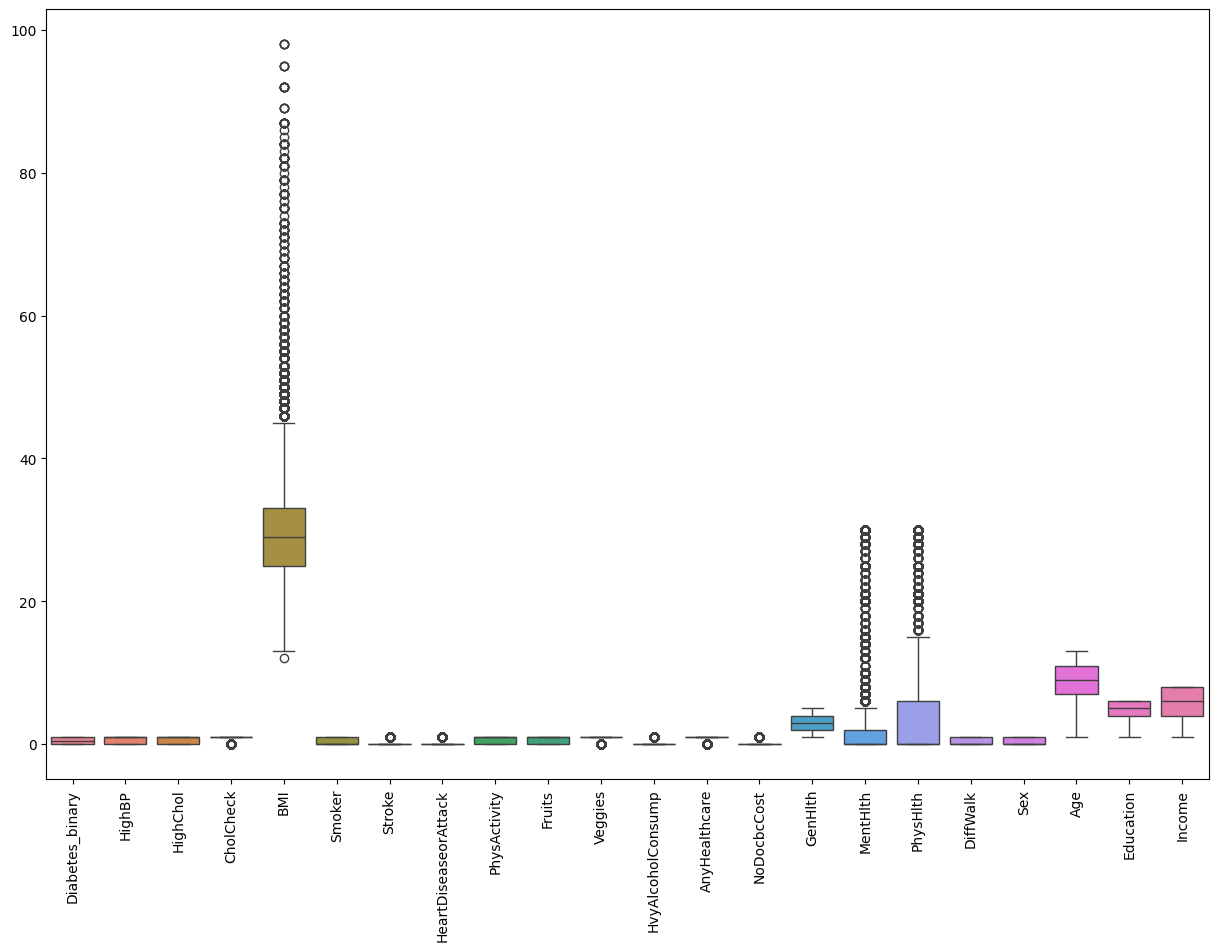

In [11]:
# Crear boxplots para todas las características
plt.figure(figsize=(15, 10))
sns.boxplot(data=diabetes)
plt.xticks(rotation=90)
plt.show()

Ahora parecen ser el IMC, Mental Health y Physic Health las características con más ruido. Usaremos un último criterio para finalizar el análisis.

**Z-score:** Un valor es atípico si su Z-score es mayor a un umbral (típicamente 3).

In [12]:
from scipy.stats import zscore

# Calcular Z-scores
z_scores = diabetes.apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print(outliers)  # Total de valores atípicos por columna

Diabetes_binary            0
HighBP                     0
HighChol                   0
CholCheck               1749
BMI                      801
Smoker                     0
Stroke                  4395
HeartDiseaseorAttack       0
PhysActivity               0
Fruits                     0
Veggies                    0
HvyAlcoholConsump       3020
AnyHealthcare           3184
NoDocbcCost             6639
GenHlth                    0
MentHlth                4373
PhysHlth                   0
DiffWalk                   0
Sex                        0
Age                        0
Education                 75
Income                     0
dtype: int64


Visualización de valores atípicos para BMI

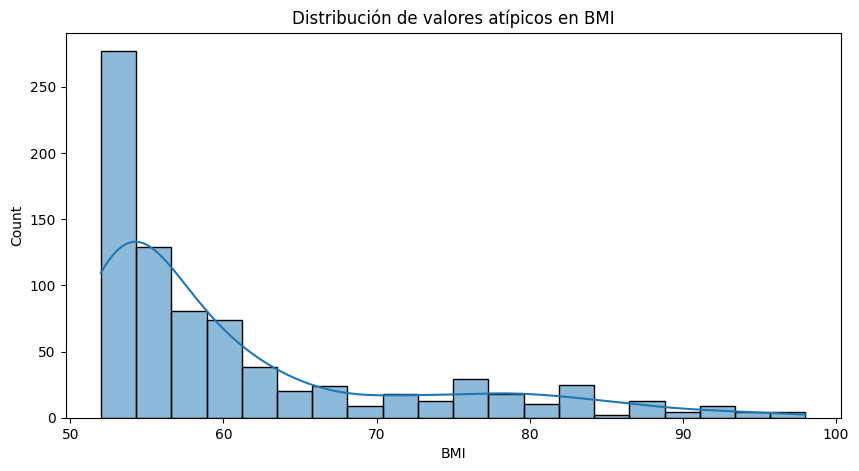

In [13]:
# Calcular Z-scores para la característica 'BMI'
z_scores_bmi = zscore(diabetes['BMI'])

# Filtrar los valores atípicos (Z-score mayor a 3 o menor a -3)
outliers_bmi = diabetes.loc[(z_scores_bmi > 3) | (z_scores_bmi < -3), 'BMI']

# Visualizar histogramas de los valores atípicos
plt.figure(figsize=(10, 5))
sns.histplot(outliers_bmi, kde=True)
plt.title('Distribución de valores atípicos en BMI')
plt.show()

In [14]:
outliers_bmi.head(10)

13     58.0
192    52.0
199    69.0
284    56.0
446    52.0
553    92.0
587    53.0
612    98.0
783    79.0
791    58.0
Name: BMI, dtype: float64

Un IMC de 40 o más representa obesidad grado 3, que si bien es cierto que en USA hay demasiados casos de obesidad grado 3, un IMC de 58, por ejemplo, está muy por encima del límite de obesidad mórbida (obesidad grado 3). Uno de 98 es impensable.

In [15]:
outliers_bmi.describe()

count    801.000000
mean      60.901373
std       10.629394
min       52.000000
25%       53.000000
50%       56.000000
75%       64.000000
max       98.000000
Name: BMI, dtype: float64

Finalmente podemos decir que tanto el IMC como Mental Health son características que es probable que contengan valores atípicos (outliers), debido a que no podemos asegurar que son variables que nos interesen, aún no borraremos instancias, sin embargo de requerirse usar la variable "BMI" por ejemplo, haremos limpieza de algunas instancias con el siguiente código.

In [16]:
# Filtrar el dataset eliminando los valores atípicos de BMI
diabetes_cleaned = diabetes[(z_scores_bmi <= 3) & (z_scores_bmi >= -3)]

In [17]:
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69891 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69891 non-null  float64
 1   HighBP                69891 non-null  float64
 2   HighChol              69891 non-null  float64
 3   CholCheck             69891 non-null  float64
 4   BMI                   69891 non-null  float64
 5   Smoker                69891 non-null  float64
 6   Stroke                69891 non-null  float64
 7   HeartDiseaseorAttack  69891 non-null  float64
 8   PhysActivity          69891 non-null  float64
 9   Fruits                69891 non-null  float64
 10  Veggies               69891 non-null  float64
 11  HvyAlcoholConsump     69891 non-null  float64
 12  AnyHealthcare         69891 non-null  float64
 13  NoDocbcCost           69891 non-null  float64
 14  GenHlth               69891 non-null  float64
 15  MentHlth              69

### Selección de variables para el modelo

**Generación de un mapa de calor para analizar la correlación con la variable objetivo**

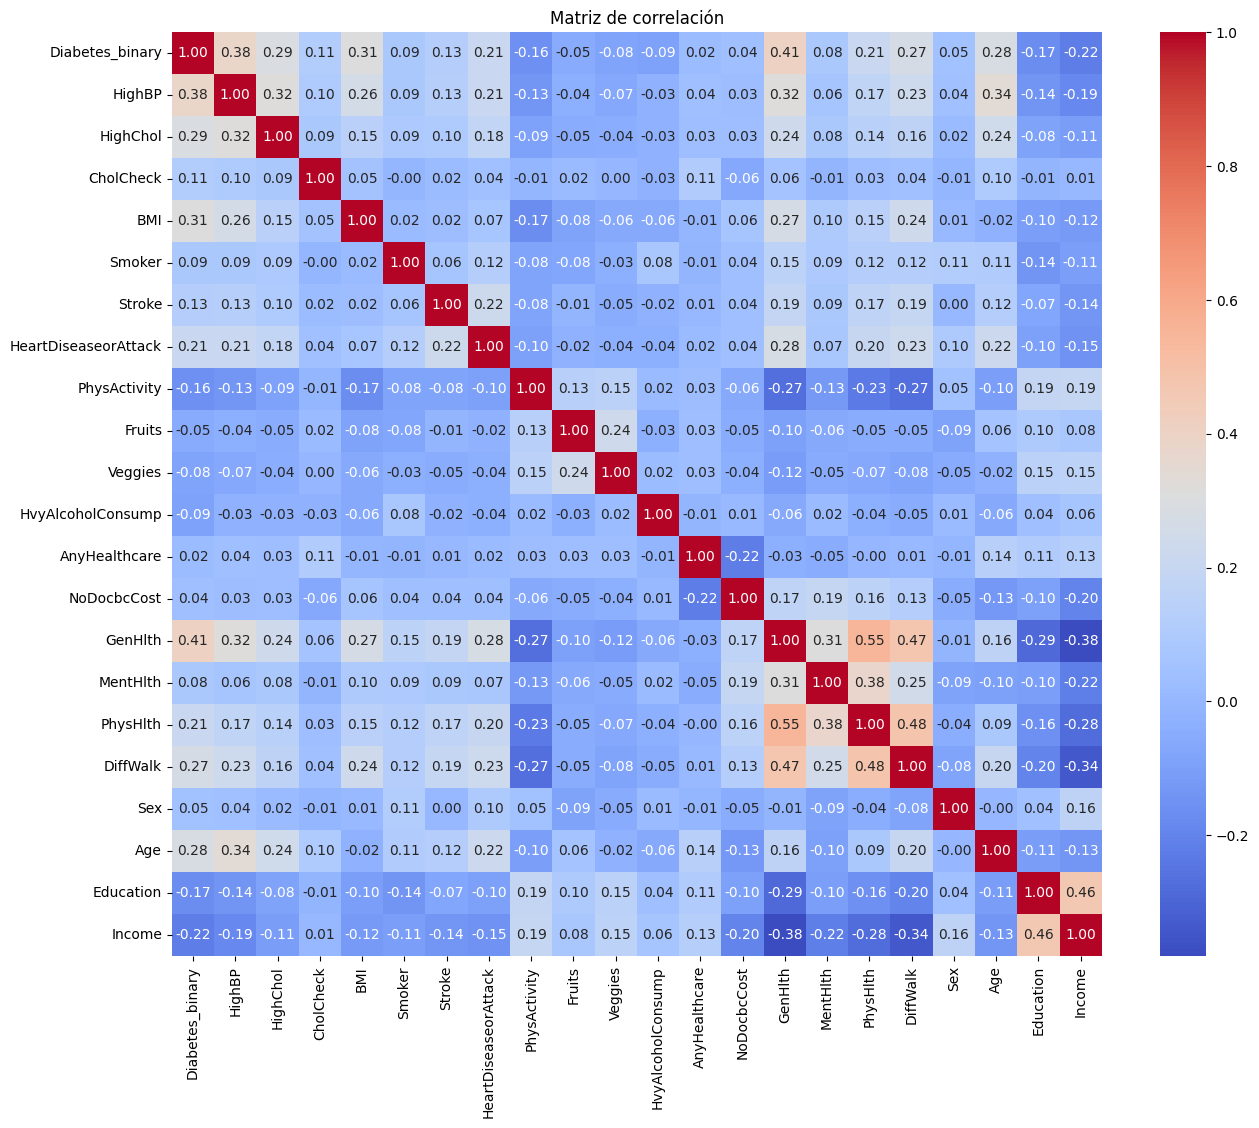

In [18]:
plt.figure(figsize=(15, 12))
sns.heatmap(diabetes_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Observamos que no existen correlaciones fuertes directas con la variable objetivo, por lo que procedemos a usar otros métodos para la selección de variables

**Métodos de selección de características basados en pruebas estadísticas**

 Los *p-valores* indican la significancia estadística de cada característica en relación con la variable objetivo.

In [19]:
# Separamos las características (X) y la variable objetivo (y)
X = diabetes_cleaned.drop('Diabetes_binary', axis=1)
y = diabetes_cleaned['Diabetes_binary']

Una variable es significativa si su valor $p<.05$

In [20]:
import statsmodels.api as sm

# Agregamos una constante (intercepto) para el modelo
X_with_const = sm.add_constant(X)

# Ajustamos el modelo con statsmodels
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Ver los p-valores de las características
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.509976
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                69891
Model:                          Logit   Df Residuals:                    69869
Method:                           MLE   Df Model:                           21
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.2642
Time:                        20:06:02   Log-Likelihood:                -35643.
converged:                       True   LL-Null:                       -48444.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.2282      0.127    -57.099      0.000      -7.476      -6.980

**Regularización (Lasso)**

Valores iguales o muy cercanos a 0 pueden ser descartados

In [21]:
from sklearn.linear_model import LogisticRegressionCV

# Ajusta un modelo de regresión logística con regularización L1
model_lasso = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=1000)
model_lasso.fit(X, y)


LogisticRegressionCV(max_iter=1000, penalty='l1', solver='liblinear')

In [22]:
df=pd.DataFrame(model_lasso.coef_, columns=X.columns)
df.value_counts()

HighBP    HighChol  CholCheck  BMI       Smoker  Stroke    HeartDiseaseorAttack  PhysActivity  Fruits     Veggies    HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth   MentHlth   PhysHlth  DiffWalk  Sex       Age       Education  Income   
0.711849  0.576437  1.060543   0.086801  0.0     0.147009  0.249335              -0.023482     -0.029748  -0.056004  -0.692189          0.0            0.0          0.570769  -0.004673  -0.0073   0.095373  0.255479  0.153843  -0.042935  -0.061675    1
Name: count, dtype: int64

Crear data frame con las características seleccionadas basado en lo anteriormente mencionado

In [23]:
#Seleccionar características
diabetes_new = diabetes_cleaned.drop(columns=["NoDocbcCost", "Smoker", "AnyHealthcare", "PhysActivity", "Fruits", "MentHlth", "Veggies"])

In [24]:
diabetes_new.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     0.0   
5              0.0     0.0       0.0        1.0  18.0     0.0   
6              0.0     0.0       1.0        1.0  26.0     0.0   
7              0.0     0.0       0.0        1.0  31.0     0.0   
8              0.0     0.0       0.0        1.0  32.0     0.0   
9              0.0     0.0       0.0        1.0  27.0     0.0   

   HeartDiseaseorAttack  HvyAlcoholConsump  GenHlth  PhysHlth  DiffWalk  Sex  \
0                   0.0                0.0      3.0      30.0       0.0  1.0   
1                   0.0                0.0      3.0       0.0       0.0  1.0   
2                   0.0                0.0      1.0      10.0       0.0  1.0   
3                   0.0                0.0      3.0       3.0       0.0  1.0   
4                   0.0                0.0      2.0       0.0       0.0  0.0   
5                   0.0                0.0      2.0       0.0       0.0  0.0   
6                   0.0                1.0      1.0       0.0       0.0  1.0   
7                   0.0                0.0      4.0       0.0       0.0  1.0   
8                   0.0                0.0      3.0       0.0       0.0  0.0   
9                   0.0                0.0      3.0       6.0       0.0  1.0   

    Age  Education  Income  
0   4.0        6.0     8.0  
1  12.0        6.0     8.0  
2  13.0        6.0     8.0  
3  11.0        6.0     8.0  
4   8.0        5.0     8.0  
5   1.0        4.0     7.0  
6  13.0        5.0     6.0  
7   6.0        4.0     3.0  
8   3.0        6.0     8.0  
9   6.0        4.0     4.0

Extraer los valores para X e y

In [25]:
X = diabetes_new.drop(columns=['Diabetes_binary']).values
y=diabetes_new["Diabetes_binary"].values

### Preparación de los datos

In [26]:
X,y

(array([[ 1.,  0.,  1., ...,  4.,  6.,  8.],
        [ 1.,  1.,  1., ..., 12.,  6.,  8.],
        [ 0.,  0.,  1., ..., 13.,  6.,  8.],
        ...,
        [ 1.,  1.,  1., ..., 13.,  6.,  4.],
        [ 1.,  1.,  1., ..., 11.,  2.,  4.],
        [ 1.,  1.,  1., ...,  9.,  6.,  2.]]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [27]:
X.shape, y.shape

((69891, 14), (69891,))

Estandarizamos los valores para X ya que no todo está en la misma escala

In [28]:
# Estandarizar X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_scaled

array([[ 0.8842701 , -1.05183461,  0.15936162, ..., -1.61103496,
         1.04610815,  1.05474772],
       [ 0.8842701 ,  0.95071981,  0.15936162, ...,  1.19252298,
         1.04610815,  1.05474772],
       [-1.13087619, -1.05183461,  0.15936162, ...,  1.54296772,
         1.04610815,  1.05474772],
       ...,
       [ 0.8842701 ,  0.95071981,  0.15936162, ...,  1.54296772,
         1.04610815, -0.78865897],
       [ 0.8842701 ,  0.95071981,  0.15936162, ...,  0.84207823,
        -2.84342741, -0.78865897],
       [ 0.8842701 ,  0.95071981,  0.15936162, ...,  0.14118875,
         1.04610815, -1.71036232]])

Separamos el conjunto de datos en prueba y entrenamiento

In [30]:
#separar conjunto de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modelo de regresión logística

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear el modelo de regresión logística
model = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


Calcular accuracy para el conjunto de prueba

In [32]:
# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy del modelo de regresión logística: {accuracy:.2f}")

Accuracy del modelo de regresión logística: 0.75


Matriz de confusión para el modelo

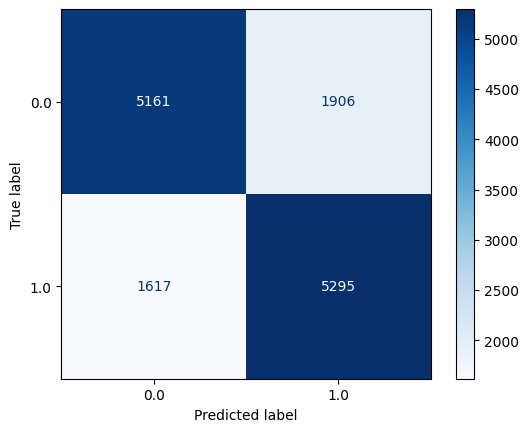

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")

Reporte de la clasificación

In [34]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print(report)

              precision    recall  f1-score   support

 No Diabetes       0.76      0.73      0.75      7067
    Diabetes       0.74      0.77      0.75      6912

    accuracy                           0.75     13979
   macro avg       0.75      0.75      0.75     13979
weighted avg       0.75      0.75      0.75     13979



Curva de ROC

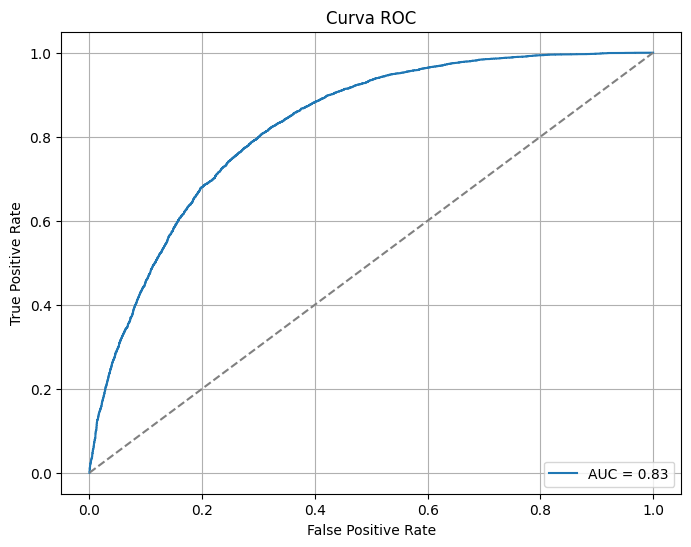

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular las probabilidades predichas
y_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el AUC
auc = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Línea de no discriminación
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

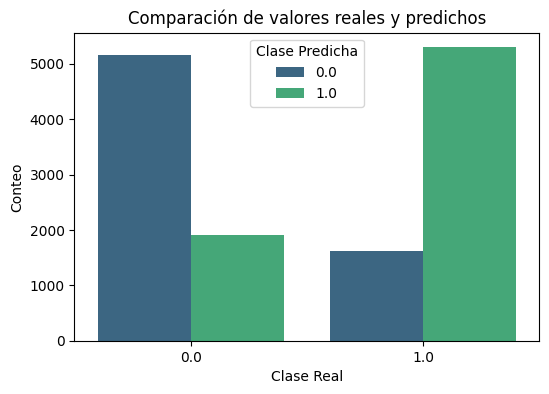

In [36]:
# Crear un DataFrame para comparar
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(x="Actual", hue="Predicted", data=results, palette="viridis")
plt.title("Comparación de valores reales y predichos")
plt.xlabel("Clase Real")
plt.ylabel("Conteo")
plt.legend(title="Clase Predicha")
plt.show()

Validación cruzada

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Crear el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Definir la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 particiones estratificadas

# Calcular el puntaje de validación cruzada
scores = cross_val_score(logistic_model, X_scaled, y, cv=cv, scoring='accuracy')

# Resultados
print(f"Puntajes de validación cruzada: {scores}")
print(f"Precisión promedio: {np.mean(scores):.2f}")
print(f"Desviación estándar: {np.std(scores):.2f}")

Puntajes de validación cruzada: [0.74826526 0.74645872 0.74688797 0.74731721 0.75075118]
Precisión promedio: 0.75
Desviación estándar: 0.00


### Modelo random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Crear el modelo Random Forest
random_forest = RandomForestClassifier(n_estimators=200, random_state=102)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)


Calcular accuracy para el conjunto de prueba

In [40]:
# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)

# Mostrar el resultado
print(f"Accuracy del modelo Random Forest: {accuracy:.2f}")

Accuracy del modelo Random Forest: 0.72


Graficar el primer árbol de desición usado para el bosque aleatorio

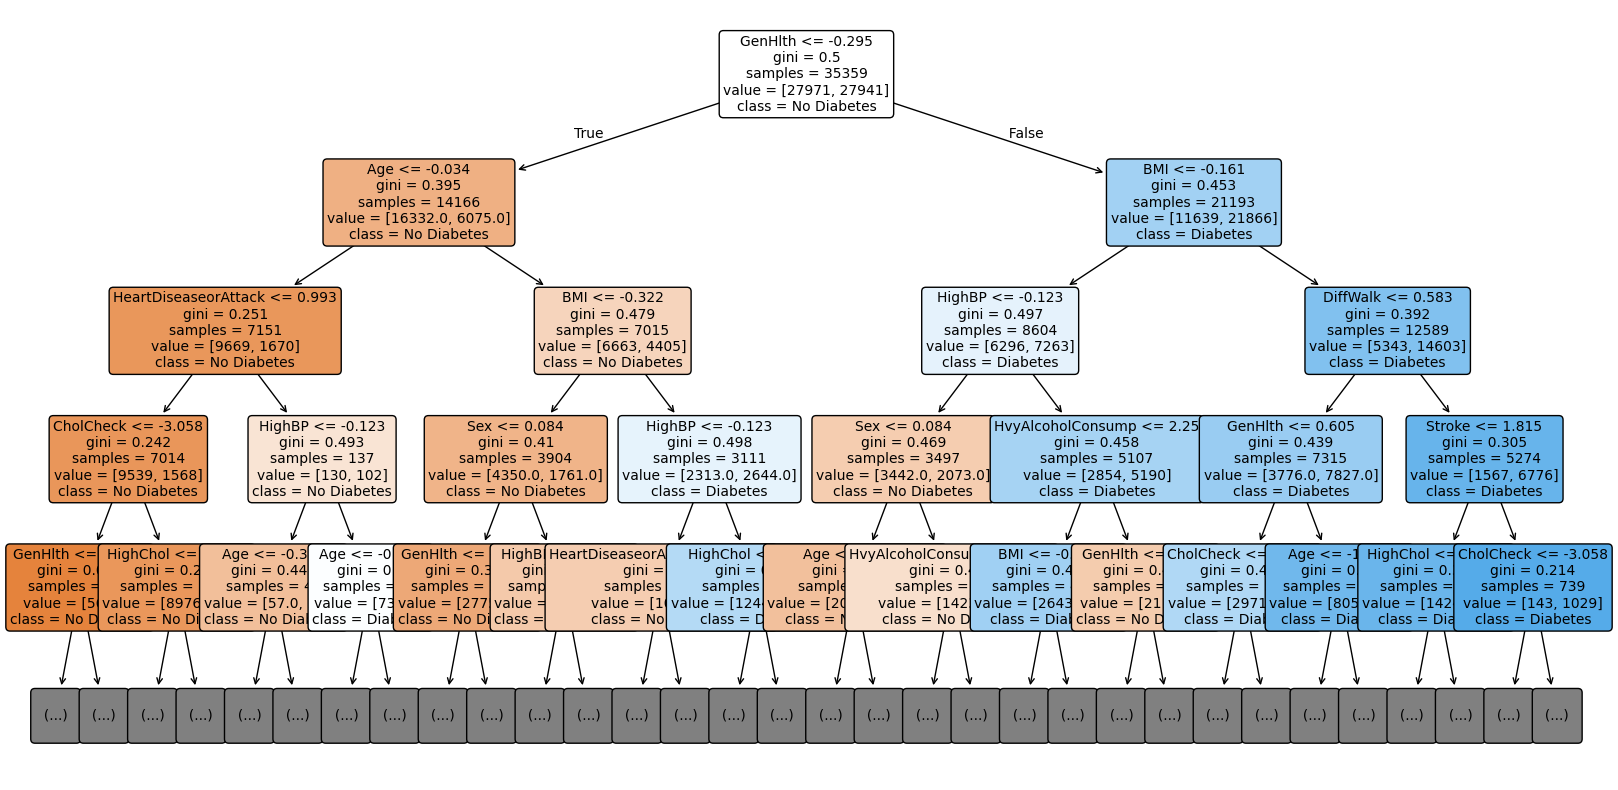

In [41]:
from sklearn.tree import plot_tree

# Seleccionar uno de los árboles del bosque aleatorio
arbol_individual = random_forest.estimators_[0]  # Seleccionamos el primer árbol

class_names = ['No Diabetes', 'Diabetes']
# Limitar la profundidad del árbol al graficar
plt.figure(figsize=(20, 10))
plot_tree(arbol_individual,
          feature_names=diabetes_new.drop(columns=['Diabetes_binary']).columns,
          class_names=class_names,
          max_depth=4,  # Limitar la profundidad del árbol
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

Matriz de confusion para el modelo

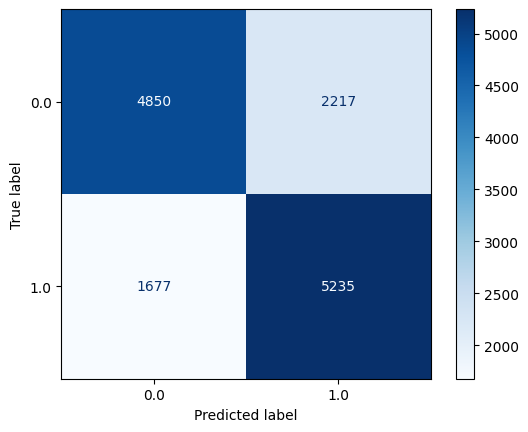

In [42]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")

Validación cruzada

In [43]:
# Definir la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular el puntaje de validación cruzada
scores = cross_val_score(random_forest, X_scaled, y, cv=cv, scoring='accuracy')

# Resultados
print(f"Puntajes de validación cruzada: {scores}")
print(f"Precisión promedio: {np.mean(scores):.2f}")
print(f"Desviación estándar: {np.std(scores):.2f}")

Puntajes de validación cruzada: [0.72122469 0.72385177 0.72420947 0.72313636 0.72299328]
Precisión promedio: 0.72
Desviación estándar: 0.00


Obtenemos mínimamente mejores resultados con la regresión logística